Simulação de circuito eletrico

In [1]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


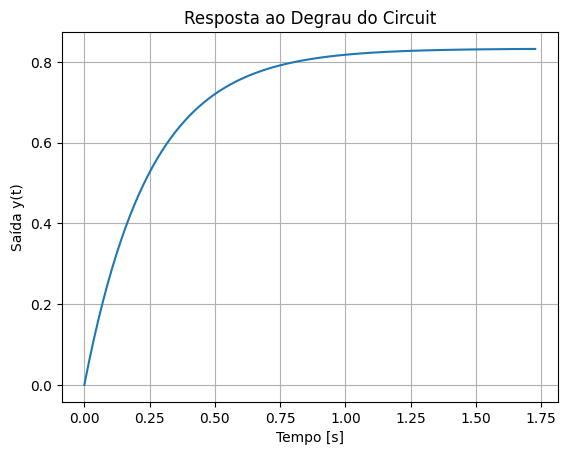

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Matrizes exemplo
R = 10
Rc = 5
Rl = 2
L = 1
C = 0.1

A = np.array(
    [
        [-(Rc*R + Rc*Rl + Rl*R)/(L*(R+Rc)), -R/(L*(R+Rc))],
        [R/((R+Rc)*C), -1/((R+Rc)*C)]
    ]
)

B = np.array(
    [
        [1/L],
        [0]
    ]
)

Cmat = np.array(
    [
        [R*Rc/(R+Rc), R/(R+Rc)]
    ]
)

D = np.array([[0]])

#cria sistema em espaço de estados
sys = ct.ss(A, B, Cmat, D)

# resposta ao degrau
t, y = ct.step_response(sys)
plt.plot(t, y)
plt.title("Resposta ao Degrau do Circuit")
plt.xlabel("Tempo [s]")
plt.ylabel("Saída y(t)")
plt.grid(True)
plt.show()

In [4]:
sys_tf = ct.ss2tf(sys)
print(sys_tf)

<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  3.333 s + 6.667
  ---------------
   s^2 + 6 s + 8


In [6]:
pip install sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import sympy as sp

r_l, L, r_c, R, C, s = sp.symbols('r_l L r_c R C s')

A = sp.Matrix([
    [ (-r_c*R + r_c*r_l + r_l*R)/(L*(R + r_c)), -R/(L*(R + r_c)) ],
    [ R/((R + r_c)*C), -1/((R + r_c)*C) ]
])

B = sp.Matrix([[1/L], [0]])

C_mat = sp.Matrix([[R*r_c/(R + r_c), R/(R + r_c)]])

D = sp.Matrix([[0]])

I = sp.eye(2)

inv_mat = (s*I - A).inv()

tf = C_mat * inv_mat * B + D

tf_simplified = sp.simplify(tf[0,0])

tf_simplified

R*(C*r_c*s + 1)/(C*L*R*s**2 + C*L*r_c*s**2 + C*R*r_c*s - C*R*r_l*s - C*r_c*r_l*s + L*s + R - r_l)

PI and PD

In [2]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 kB 6.6 MB/s eta 0:00:000:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 11.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 6.6 MB/s eta 0:00:000m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 11.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install control

  Using cached control-0.10.2-py3-none-any.whl (578 kB)
  Using cached scipy-1.16.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.4 MB)
Note: you may need to restart the kernel to use updated packages.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


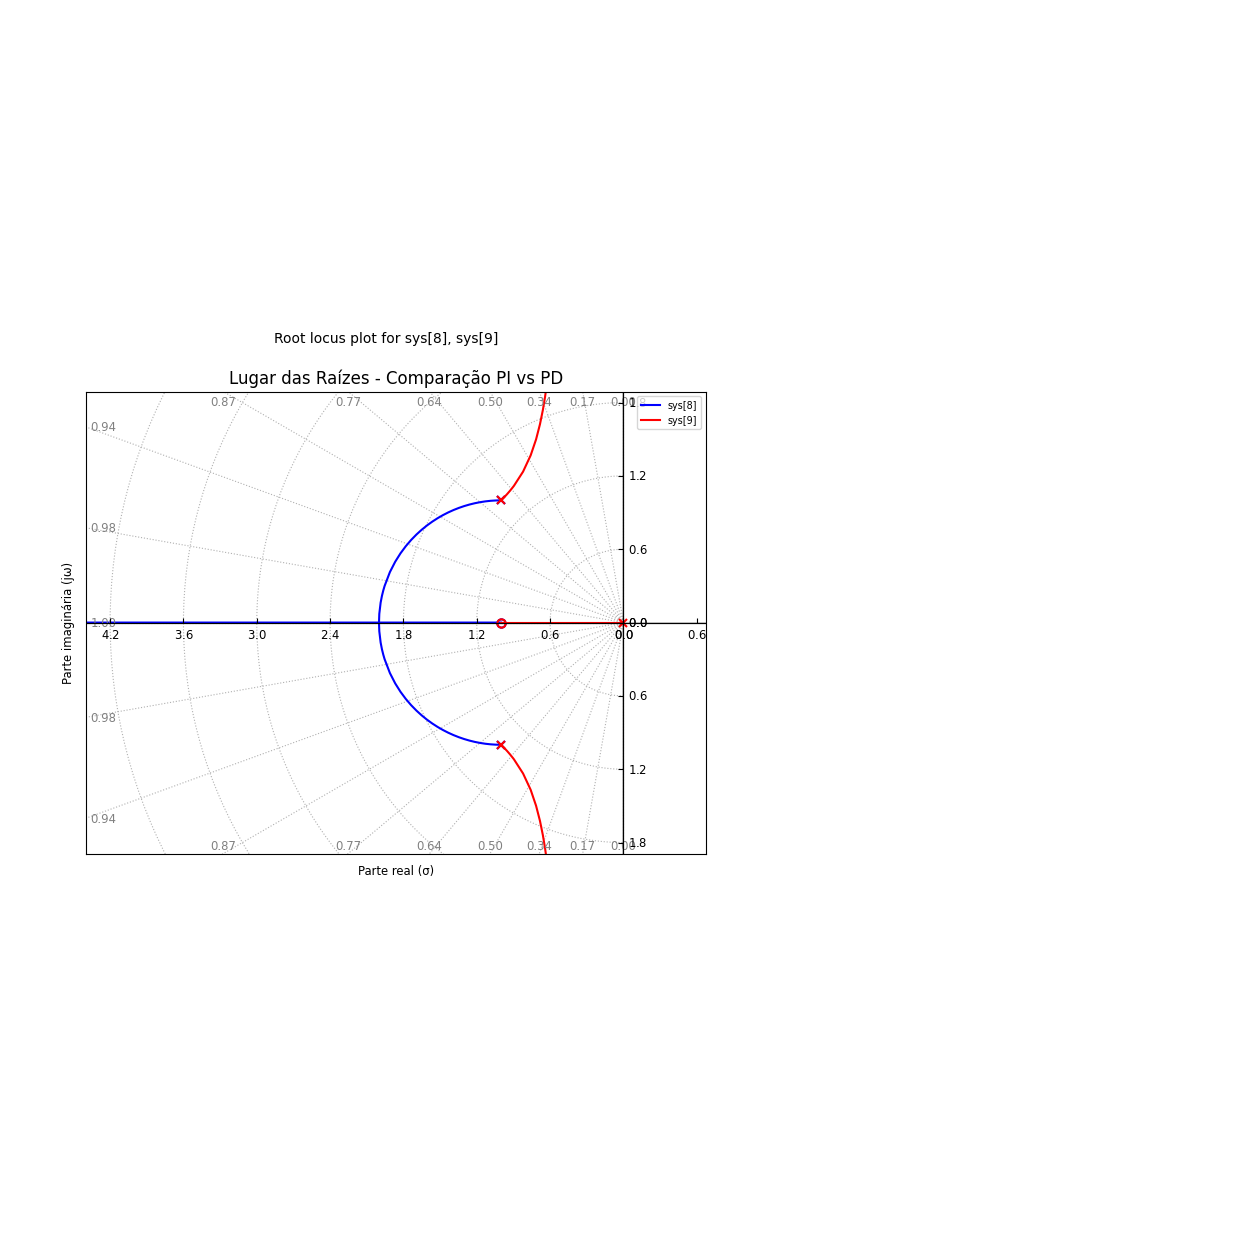

In [6]:
import matplotlib.pyplot as plt
import control as ctl

# Sistema de exemplo: G(s) = 1 / (s^2 + 2s + 2)
G = ctl.TransferFunction([1], [1, 2, 2])

# Controlador PD: C(s) = s+1
C_PD = ctl.TransferFunction([1, 1], [1])

# Controlador PI: C(s) = (s+1)/s
C_PI = ctl.TransferFunction([1, 1], [1, 0])

# Malha aberta
L_PD = C_PD * G
L_PI = C_PI * G

# Plot
plt.figure(figsize=(8,6))
ctl.rlocus(L_PD, color='b')   # PD em azul
ctl.rlocus(L_PI, color='r')   # PI em vermelho

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Lugar das Raízes - Comparação PI vs PD")
plt.xlabel("Parte real (σ)")
plt.ylabel("Parte imaginária (jω)")
plt.grid(True)
plt.show()


# Sitema Original, PI e PD
---

## 👉 Controlador **PD**
* **Com PD** → a ação **derivativa** acrescenta um **zero** à função de transferência em malha aberta, o que geralmente “puxa” os polos dominantes para a **esquerda** (mais estáveis, resposta mais rápida).

Um **controlador proporcional-derivativo** tem a forma:

$$
C(s) = K_p + K_d s = K_p \left(1 + T_d s\right)
$$

O que ele faz:

1. **Adiciona um zero em s = -1/T\_d**

   * Esse zero “puxa” os polos dominantes **para a esquerda** no lugar das raízes.
   * Resultado: o sistema responde mais **rápido** e com **menor sobre-sinal** (melhora no amortecimento).

2. **Não muda a ordem do sistema**

   * Diferente do PI (que adiciona polo na origem), o PD não altera o tipo do sistema.
   * Por isso, **não garante erro estacionário nulo** (se o sistema já tinha erro, ele continua).

---

## 👉 Controlador **PI**

Um **controlador proporcional-integral** tem a forma:

$$
C(s) = K_p + \frac{K_i}{s} = K_p\left(1 + \frac{1}{T_i s}\right)
$$

O que ele faz:

1. **Adiciona um polo na origem (s = 0)**

   * Isso aumenta o **tipo do sistema** em 1.
   * Resultado: o erro em regime permanente para entrada **degrau** passa a ser **zero**.

2. **Adiciona também um zero em s = -1/T\_i**

   * Esse zero pode compensar parte do efeito de lentidão do polo em zero.

---

## 📌 Diferença prática

* **PD**: foca em **melhorar o transitório** (mais rápido, menos oscilatório), mas não mexe tanto no erro estacionário.
* **PI**: foca em **melhorar o regime permanente** (erro nulo para degrau), mas pode deixar o transitório mais lento ou até mais oscilatório.

---

👉 Por isso, muitas vezes se junta os dois: **PID**.

* O **P** dá ganho.
* O **I** elimina erro estacionário.
* O **D** acelera e amortece o sistema.

---

### 🔎 Intuição no lugar das raízes

* **PD**: desloca polos dominantes **para a esquerda** (acelera).
* **PI**: acrescenta **um polo em 0**, que **atrai parte do lugar das raízes para perto do eixo imaginário**, ou seja:

  * sistema tende a ficar **mais lento**;
  * mas **ganha precisão em regime permanente** (erro nulo para degrau).

---

👉 Resumindo:

* **PD**: foco em **velocidade/transitório**.
* **PI**: foco em **erro estacionário/regime permanente**.
* Muitas vezes se combina: **PID** → pega o melhor dos dois mundos.

---


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


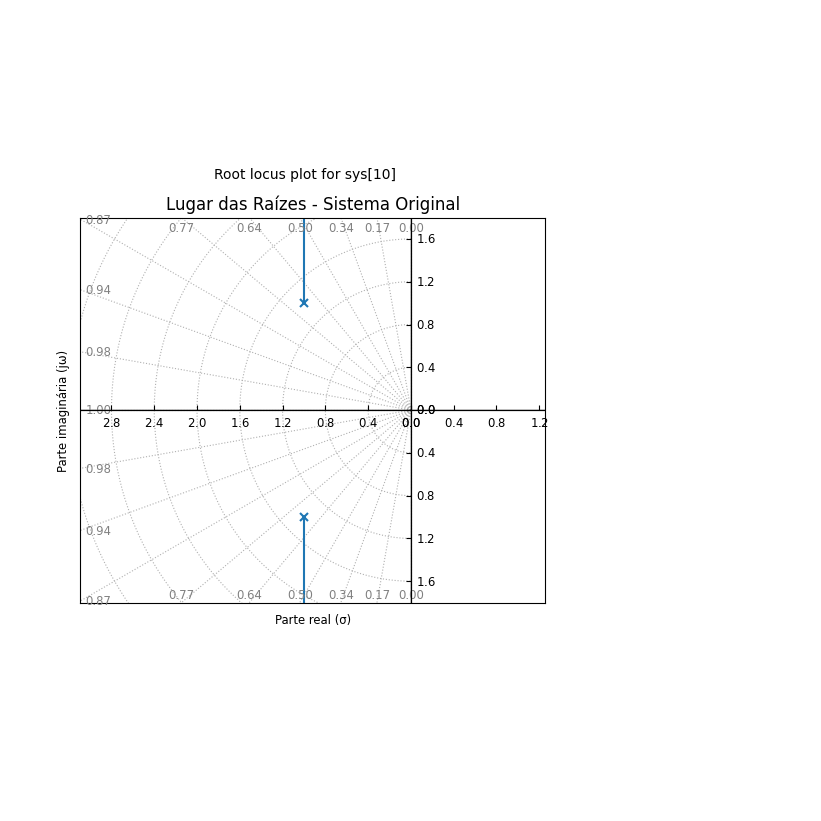

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


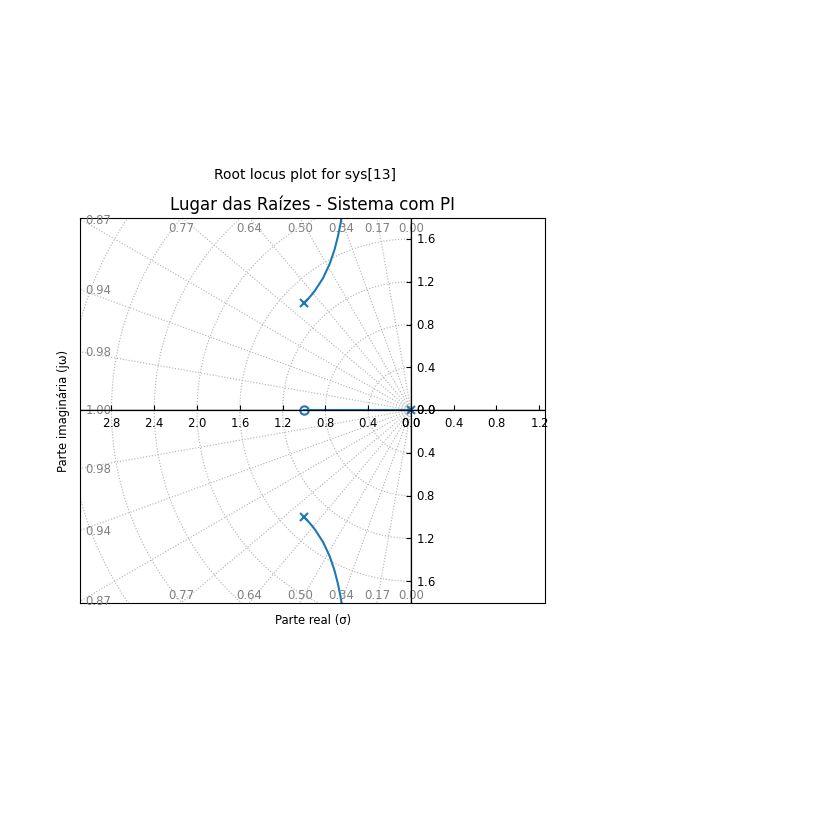

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


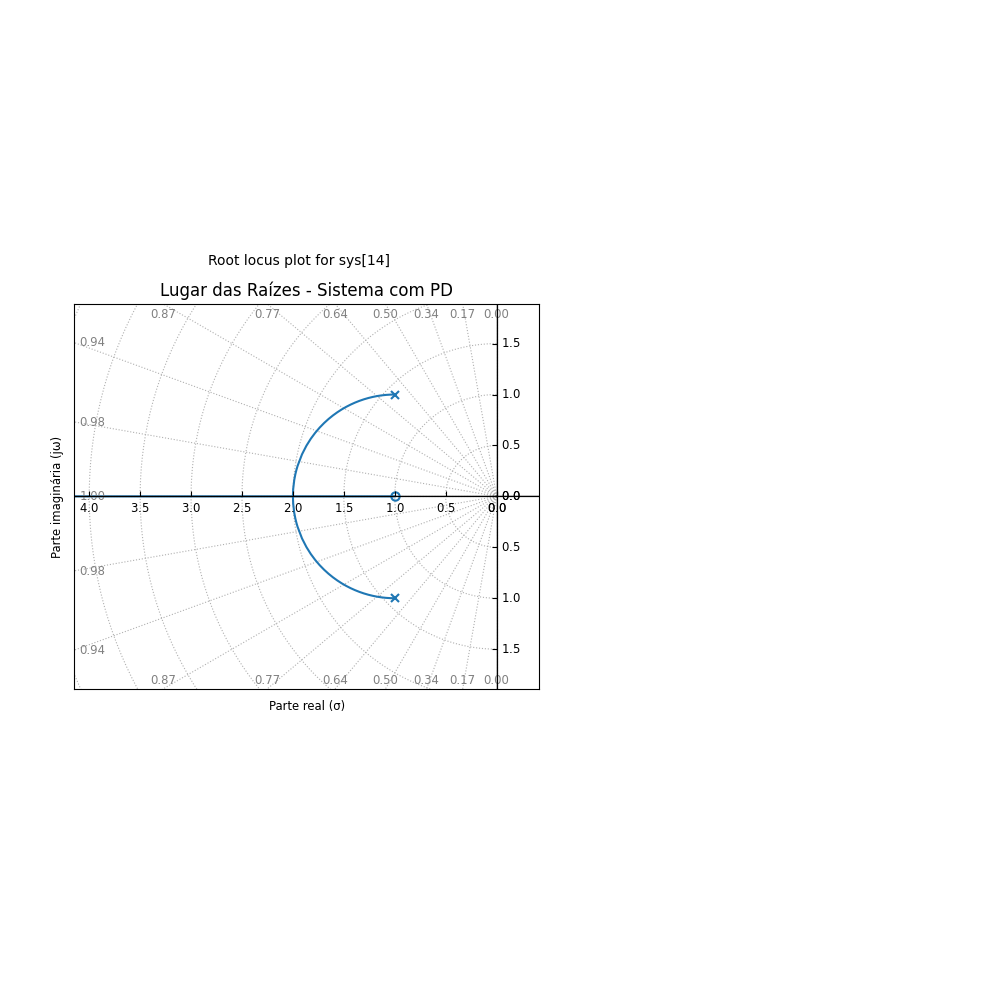

In [7]:
import matplotlib.pyplot as plt
import control as ctl

# Sistema de exemplo de 2ª ordem
# G(s) = 1 / (s^2 + 2s + 2)
G = ctl.TransferFunction([1], [1, 2, 2])

# Controladores
C_PI = ctl.TransferFunction([1, 1], [1, 0])   # PI: (s+1)/s
C_PD = ctl.TransferFunction([1, 1], [1])      # PD: (s+1)

# Malha aberta
L0 = G
L_PI = C_PI * G
L_PD = C_PD * G

# --- 1. Sistema original ---
plt.figure(figsize=(6,5))
ctl.rlocus(L0)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Lugar das Raízes - Sistema Original")
plt.xlabel("Parte real (σ)")
plt.ylabel("Parte imaginária (jω)")
plt.grid(True)

# --- 2. Com PI ---
plt.figure(figsize=(6,5))
ctl.rlocus(L_PI)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Lugar das Raízes - Sistema com PI")
plt.xlabel("Parte real (σ)")
plt.ylabel("Parte imaginária (jω)")
plt.grid(True)

# --- 3. Com PD ---
plt.figure(figsize=(6,5))
ctl.rlocus(L_PD)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Lugar das Raízes - Sistema com PD")
plt.xlabel("Parte real (σ)")
plt.ylabel("Parte imaginária (jω)")
plt.grid(True)

plt.show()
